In [46]:
import cv2
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt

def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
    return image

def extract_overlapping_patches(image, patch_size, stride):
    patches = []
    img_height, img_width = image.shape[:2]
    patch_height, patch_width = patch_size

    for i in range(0, img_height - patch_height + 1, stride):
        for j in range(0, img_width - patch_width + 1, stride):
            patch = image[i:i+patch_height, j:j+patch_width]
            patches.append(patch)
    return patches

def extract_hog_features(patches, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    hog_features = []
    for patch in patches:
        feature_vector, hog_image = hog(
            patch,
            orientations=orientations,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block,
            visualize=True,
			channel_axis=-1
            # multichannel=True
        )
        hog_features.append((feature_vector, hog_image))
    return hog_features


def visualize_patches_and_hog(patches, hog_features):
    feature_vectors = [feature_vector for feature_vector, _ in hog_features]
    for i, (patch, (feature_vector, hog_image)) in enumerate(zip(patches, hog_features)):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

        ax1.axis('off')
        ax1.imshow(patch)
        ax1.set_title(f'Patch {i+1}')

        ax2.axis('off')
        ax2.imshow(hog_image, cmap=plt.cm.gray)
        ax2.set_title('HOG Features')
        print(f'Patch {i+1} HOG feature vector shape: {feature_vector.shape}')

        plt.show()

    return feature_vectors



Patch 1 HOG feature vector shape: (1764,)


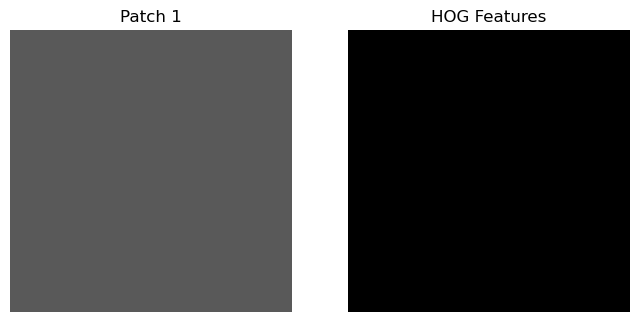

Patch 2 HOG feature vector shape: (1764,)


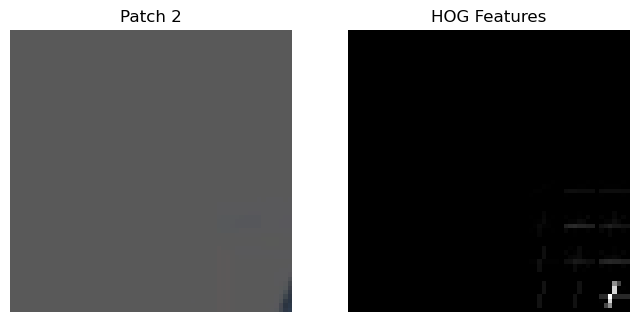

Patch 3 HOG feature vector shape: (1764,)


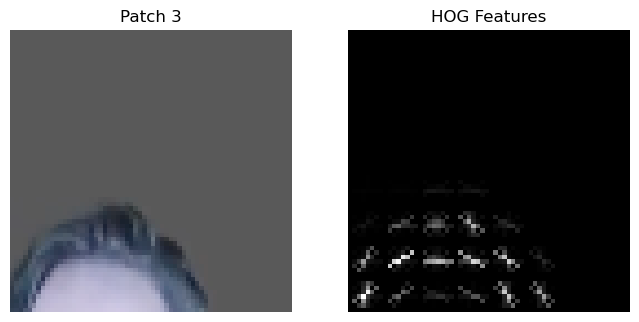

Patch 4 HOG feature vector shape: (1764,)


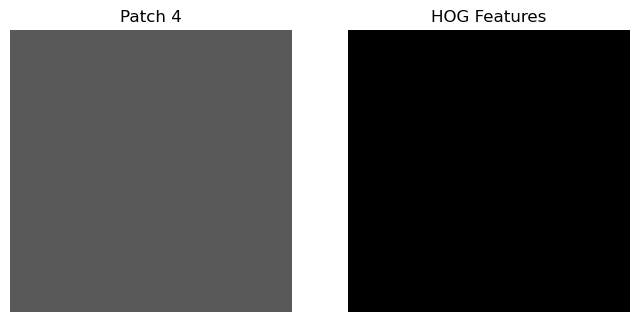

Patch 5 HOG feature vector shape: (1764,)


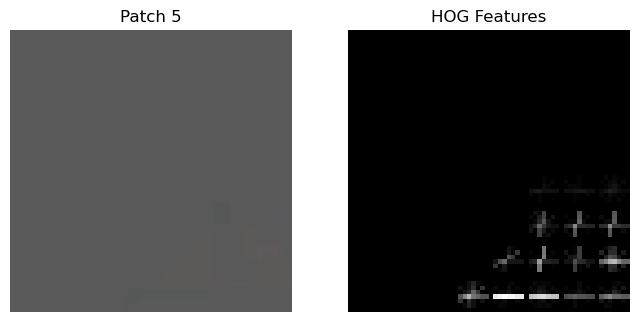

Patch 6 HOG feature vector shape: (1764,)


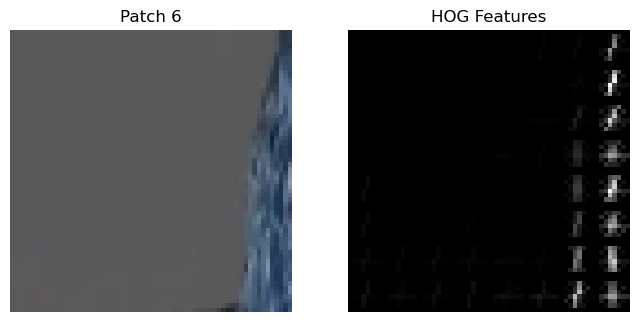

Patch 7 HOG feature vector shape: (1764,)


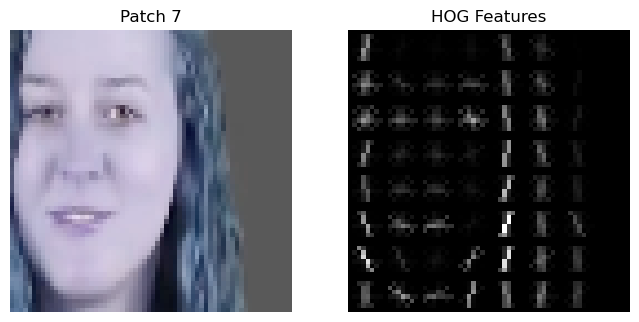

Patch 8 HOG feature vector shape: (1764,)


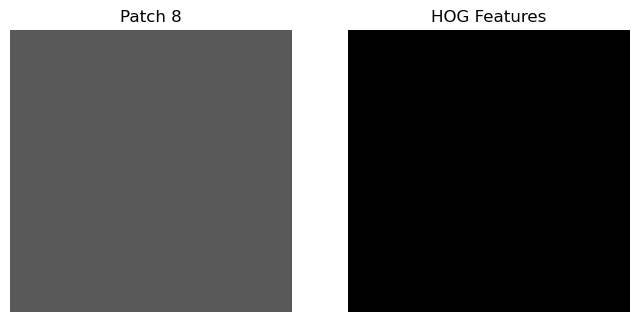

Patch 9 HOG feature vector shape: (1764,)


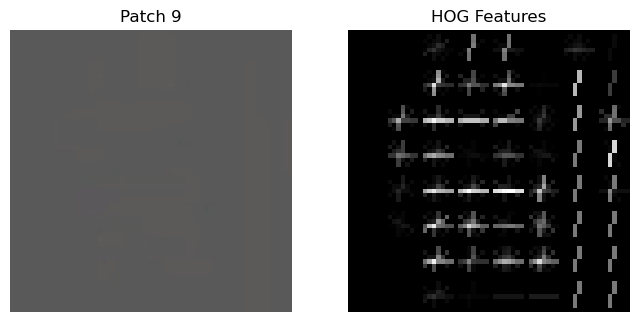

Patch 10 HOG feature vector shape: (1764,)


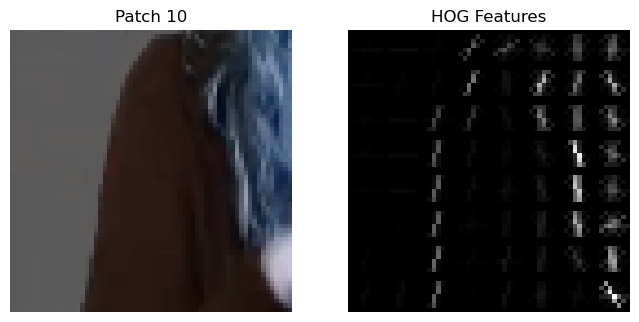

Patch 11 HOG feature vector shape: (1764,)


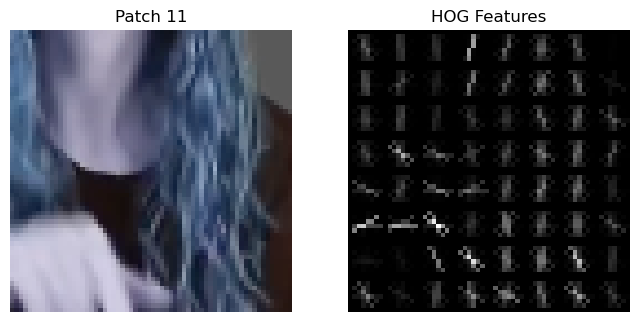

Patch 12 HOG feature vector shape: (1764,)


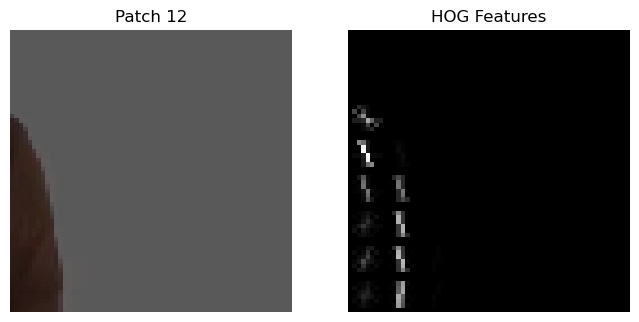

Patch 13 HOG feature vector shape: (1764,)


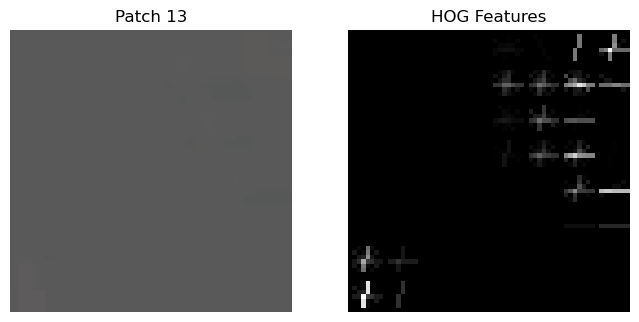

Patch 14 HOG feature vector shape: (1764,)


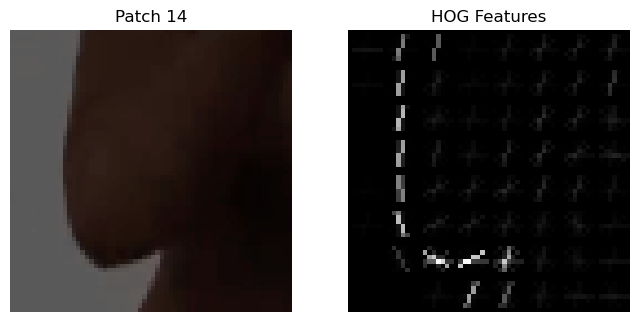

Patch 15 HOG feature vector shape: (1764,)


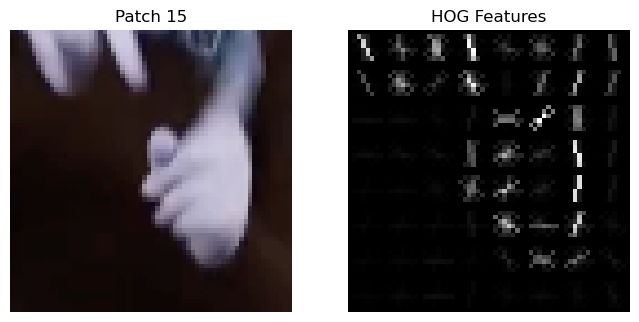

Patch 16 HOG feature vector shape: (1764,)


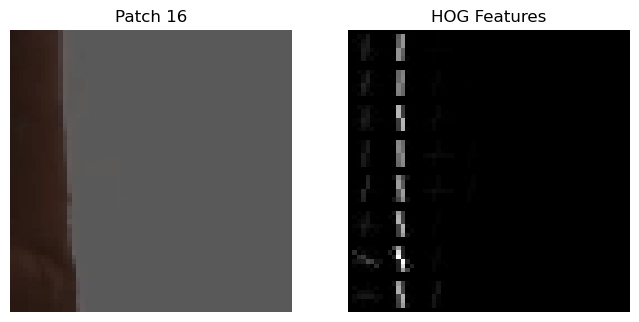

In [47]:
image = load_image(image_path)
# resize image
image = cv2.resize(image, (256, 256))

patch_size = (64, 64)  # Example patch size
patches = extract_overlapping_patches(image, patch_size, stride=64)
hog_features = extract_hog_features(patches)

# Visualize HOG features of the first patch
fvec = visualize_patches_and_hog(patches, hog_features)


In [50]:
np.array(fvec).shape

(16, 1764)

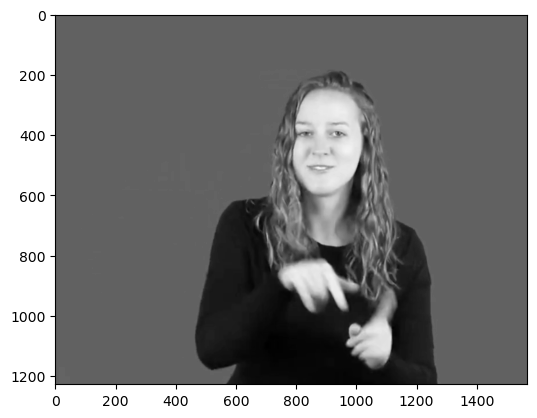

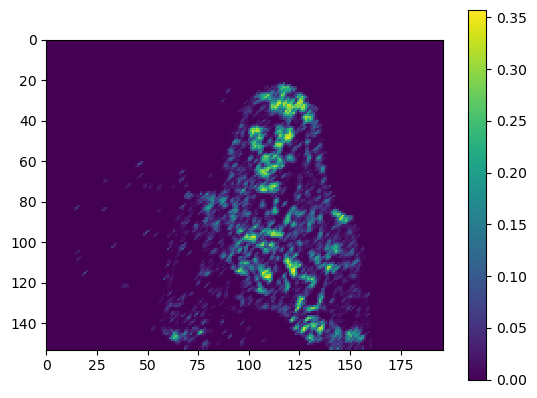

TypeError: Invalid shape (153, 196, 9) for image data

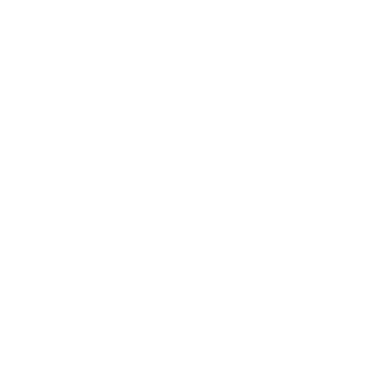

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread("test.png"),
                   cv2.COLOR_BGR2GRAY)

cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Preview
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

bin = 5  # angle is 360 / nbins * direction
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('HOG Features')
print(f'Patch {i+1} HOG feature vector shape: {feature_vector.shape}')

In [ ]:
def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bin_n = 16 # Number of bins
    bin = np.int32(bin_n*ang/(2*np.pi))

    bin_cells = []
    mag_cells = []

    cellx = celly = 8

    for i in range(0,img.shape[0]/celly):
        for j in range(0,img.shape[1]/cellx):
            bin_cells.append(bin[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])
            mag_cells.append(mag[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])   

    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)

    # transform to Hellinger kernel
    eps = 1e-7
    hist /= hist.sum() + eps
    hist = np.sqrt(hist)
    hist /= norm(hist) + eps

    return hist

In [ ]:
import os
import cv2
import numpy as np

from mediapipe import solutions as mp_hands
from torch.utils.data import Dataset

class BosphorusSign22KDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.load_data()

    def load_data(self):
        for i, class_name in enumerate(os.listdir(self.root_dir)):
            class_dir = os.path.join(self.root_dir, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                self.images.append(image)
                self.labels.append(i)


    def get_hands_from_mediapipe(self, image):
        with mp_hands.Hands(
            static_image_mode=True,
            max_num_hands=2,
            min_detection_confidence=0.5) as hands:
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    return hand_landmarks
            return None
        
    def get_body_from_mediapipe(self, image):

        with mp_pose.Pose(
            static_image_mode=True,
            model_complexity=2,
            min_detection_confidence=0.5) as pose:
            results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            if results.pose_landmarks:
                return results.pose_landmarks
            return None
        

        

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [54]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.transform import resize

def extract_hog_features(patch, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9):
    hog_features = hog(
        patch, 
        orientations=orientations, 
        pixels_per_cell=pixels_per_cell, 
        cells_per_block=cells_per_block, 
        block_norm='L2-Hys', 
        visualize=False, 
        feature_vector=True
    )
    return hog_features

def extract_tubelet_hog_features(video_path, tubelet_size, overlap, patch_size):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    tubelets = []
    embeddings = []
    
    tubelet_frames = int(tubelet_size * fps)
    overlap_frames = int(overlap * fps)
    
    for start_frame in range(0, frame_count - tubelet_frames + 1, tubelet_frames - overlap_frames):
        tubelet_hog_features = []
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
        
        for _ in range(tubelet_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = rgb2gray(frame)
            
            # Divide the frame into patches
            for y in range(0, frame.shape[0], patch_size[0]):
                for x in range(0, frame.shape[1], patch_size[1]):
                    patch = frame[y:y+patch_size[0], x:x+patch_size[1]]
                    patch = resize(patch, (patch_size[0], patch_size[1]), anti_aliasing=True)
                    hog_features = extract_hog_features(patch)
                    tubelet_hog_features.append(hog_features)
        
                # if len(tubelet_hog_features) == tubelet_frames * (frame.shape[0] // patch_size[0]) * (frame.shape[1] // patch_size[1]):
                    # tubelet_hog_features = np.concatenate(tubelet_hog_features)
                    embeddings.append(tubelet_hog_features)
                    tubelets.append(patch)
    
    cap.release()
    return np.array(embeddings), np.array(tubelets)

video_path = '0744.mp4'
tubelet_size = 1.0  # Tubelet duration in seconds
overlap = 0.5  # Overlap duration in seconds
patch_size = (32, 32)  # Size of each patch

embeddings, tubelets = extract_tubelet_hog_features(video_path, tubelet_size, overlap, patch_size)

# Save or process embeddings as needed
# np.save('hog_embeddings.npy', embeddings)


: 

In [20]:
import cv2
import numpy as np
from skimage.feature import hog
# Load video
video_path = '0744.mp4'
cap = cv2.VideoCapture(video_path)

# resize  video 256x256
frame_width = 256
frame_height = 256
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

tubelet_shape = (128, 128, 10)
all_tubelets = []

# Read all frames into a list
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (frame_width, frame_height))
    frames.append(frame)

cap.release()

# Convert frames to grayscale
frames = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames]

all_hog_features = []
for start_frame in range(len(frames) - tubelet_shape[2] + 1):
    for y in range(0, frame_height - tubelet_shape[0] + 1, tubelet_shape[0]):
        for x in range(0, frame_width - tubelet_shape[1] + 1, tubelet_shape[1]):
            tubelet = np.zeros(tubelet_shape)
            for t in range(tubelet_shape[2]):
                patch = frames[start_frame + t][y:y + tubelet_shape[0], x:x + tubelet_shape[1]]
                tubelet[:, :, t] = patch
                tube_hog = []
                for pt in range(tubelet_shape[2]):
                    hog_features = hog(tubelet[:, :, pt], visualize=False)
                    tube_hog.append(hog_features)
                all_hog_features.append(np.array(tube_hog))

            all_tubelets.append(tubelet)


In [21]:
all_hog_features = np.array(all_hog_features)
print(all_hog_features.shape)

(3360, 10, 15876)


In [18]:
all_tubelets = np.array(all_tubelets)
all_tubelets.shape

(1344, 64, 64, 10)

## Trainer

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.decomposition import PCA
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.io import read_video


class TubeletExtractor:
    def __init__(self, video_path):
        self.video_path = video_path

    def extract_tubelets(self):
        video, _, _ = read_video(self.video_path)
        tubelets = []
        # Here you should implement your own logic for extracting tubelets from the video
        

        return tubelets


class HOGFeatureExtractor:
    def __init__(self, tubelets):
        self.tubelets = tubelets

    def extract_hog_features(self):
        hog_features = []
        for tubelet in self.tubelets:
            hog_feature = hog(
                tubelet,
                orientations=8,
                pixels_per_cell=(16, 16),
                cells_per_block=(1, 1),
            )
            hog_features.append(hog_feature)
        return np.concatenate(hog_features)


class TransformerEncoder(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_encoder_layers):
        super().__init__()
        self.transformer = nn.Transformer(d_model, nhead, num_encoder_layers)
        self.input_linear = nn.Linear(input_dim, d_model)
        self.output_linear = nn.Linear(d_model, input_dim)

    def forward(self, src):
        src = self.input_linear(src)
        output = self.transformer(src)
        output = self.output_linear(output)
        return output


class TransformerTrainer:
    def __init__(self, hog_features, batch_size, learning_rate, num_epochs):
        self.hog_features = hog_features
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def train_transformer(self):
        dataloader = DataLoader(
            self.hog_features, batch_size=self.batch_size, shuffle=True
        )
        model = TransformerEncoder(
            input_dim=self.hog_features.shape[1],
            d_model=512,
            nhead=8,
            num_encoder_layers=6,
        )
        criterion = nn.MSELoss()
        optimizer = Adam(model.parameters(), lr=self.learning_rate)

        for epoch in range(self.num_epochs):
            for batch in dataloader:
                optimizer.zero_grad()
                output = model(batch)
                loss = criterion(output, batch)
                loss.backward()
                optimizer.step()